<a href="https://colab.research.google.com/github/souravlouha/ML_Practice_Studio/blob/main/CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive   # Import the Colab Drive module
drive.mount('/content/drive')    # Mount your Google Drive to access files in Colab


Mounted at /content/drive


In [7]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)



## Import the ImageDataGenerator class from Keras (legacy module).
# This is used to generate batches of tensor image data with real-time data augmentation.
#from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for training data with multiple augmentations:
# - rescale=1./255: Normalizes pixel values to the range [0,1] by dividing each pixel by 255.
# - shear_range=0.2: Applies random shearing transformations to simulate perspective changes.
# - zoom_range=0.2: Randomly zooms inside images by up to 20%, enhancing robustness.
# - horizontal_flip=True: Randomly flips images horizontally to increase variation in training data.
#  train_datagen = ImageDataGenerator(
#    rescale=1./255,         # Normalize image pixel values
#    shear_range=0.2,        # Apply random shear
#    zoom_range=0.2,         # Apply random zoom
#    horizontal_flip=True    # Randomly flip images horizontally
#   )

# Create another ImageDataGenerator object for test data.
# Note: Using the same augmentations as training here, but in most cases,
# you should **only use rescaling** during testing/validation to ensure accuracy.
#     test_datagen = ImageDataGenerator(
#    rescale=1./255,         # Normalize image pixel values
#    shear_range=0.2,        # Apply random shear (not typical for test data)
#    zoom_range=0.2,         # Apply random zoom (not typical for test data)
#    horizontal_flip=True    # Randomly flip images (not typical for test data)
#   )


In [8]:
train_set=train_datagen.flow_from_directory('/content/drive/MyDrive/All_DataSets/dataset/dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/All_DataSets/dataset/dataset/training_set',target_size=(64,64),batch_size=32,class_mode='binary')



# # Use the training data generator (with augmentation) to load and preprocess images from the given directory.
# The directory should contain subfolders (one per class), each with respective images.
#   train_set = train_datagen.flow_from_directory(
#    '/content/drive/MyDrive/All_DataSets/dataset/dataset/test_set',  # Path to the image dataset for training
#    target_size=(64, 64),      # Resize all images to 64x64 pixels for uniform input size
#    batch_size=32,             # Number of images to process in each batch
#    class_mode='binary'        # Since this is a binary classification problem (2 classes), use binary mode
#        )

# Similarly, use the test data generator (with augmentation, though normally you'd only rescale)
# to load and preprocess test/validation images from the specified directory.
#        test_set = test_datagen.flow_from_directory(
#    '/content/drive/MyDrive/All_DataSets/dataset/dataset/training_set',  # Path to the image dataset for testing
#    target_size=(64, 64),      # Resize all images to 64x64 pixels
#    batch_size=32,             # Process images in batches of 32
#    class_mode='binary'        # Binary classification
#     )


Found 2000 images belonging to 2 classes.
Found 1792 images belonging to 2 classes.


In [9]:
train_set.class_indices
## This command returns a dictionary mapping each class (folder name) to its corresponding numeric label.
# For example: {'cat': 0, 'dog': 1}



{'cats': 0, 'dogs': 1}

In [11]:
# Importing required modules for building CNN
from keras.models import Sequential                            # To initialize a linear stack of layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # CNN layers: Conv, Pooling, Flattening, Dense

# Initializing the CNN
cnn_model = Sequential()  # Starting with a blank sequential model

# 1st Convolutional Layer
cnn_model.add(Conv2D(128, (3,3), activation='relu', input_shape=(64,64,3), padding='same'))
# - 128 filters of size 3x3, with ReLU activation
# - Input images are 64x64 RGB (3 channels)
# - Padding='same' ensures output dimensions remain same

cnn_model.add(MaxPooling2D(pool_size=(2,2)))  # Reduces feature map size by half using 2x2 pooling

# 2nd Convolutional Layer
cnn_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))  # 64 filters, size 3x3, ReLU activation
cnn_model.add(MaxPooling2D(pool_size=(2,2)))  # Another pooling layer to downsample

# 3rd Convolutional Layer
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))  # 3x3 conv acts as bottleneck/compression
cnn_model.add(MaxPooling2D(pool_size=(2,2)))  # Downsample the output again

# Flattening the output from 2D to 1D before fully connected layers
cnn_model.add(Flatten())  # Converts multi-dimensional output to a single vector

# Fully Connected Layers
cnn_model.add(Dense(16, activation='relu'))     # Hidden layer with 16 neurons and ReLU
cnn_model.add(Dense(1, activation='sigmoid'))   # Output layer with sigmoid for binary classification

# Compiling the model
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)  # Adam optimizer with custom learning rate

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# - Optimizer: Adam
# - Loss function: Binary Crossentropy (for binary classification)
# - Evaluation metric: Accuracy

# Display model architecture summary
cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,641 (502.50 KB)

 Trainable params: 128,641 (502.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn_model.fit(x=train_set,validation_data=test_set,epochs=10)


#cnn_model.fit(
#    x=train_set,                # 👉 The training data generator (with images & labels)
#    validation_data=test_set,  # 👉 The validation data generator (used to check accuracy/loss on unseen data after each epoch)
#    epochs=10                   # 👉 The number of times the entire training dataset is passed through the model
#   )


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 749s 11s/step - accuracy: 0.5105 - loss: 0.6964 - val_accuracy: 0.5586 - val_loss: 0.6907
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 277ms/step - accuracy: 0.4972 - loss: 0.6930 - val_accuracy: 0.4950 - val_loss: 0.6925
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.5401 - loss: 0.6908 - val_accuracy: 0.5831 - val_loss: 0.6854
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.5667 - loss: 0.6852 - val_accuracy: 0.5876 - val_loss: 0.6826
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.5660 - loss: 0.6857 - val_accuracy: 0.5787 - val_loss: 0.6806
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.6003 - loss: 0.6749 - val_accuracy: 0.5530 - val_loss: 0.7064
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 277ms/step - accuracy: 0.5943 - loss: 0.6706 - val_accuracy: 0.6172 - val_loss: 0.6626
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.6290 - loss: 0.6559 - val_accur

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step
Confusion Matrix:
 [[417 375]
 [508 492]]
Accuracy Score: 50.73 %


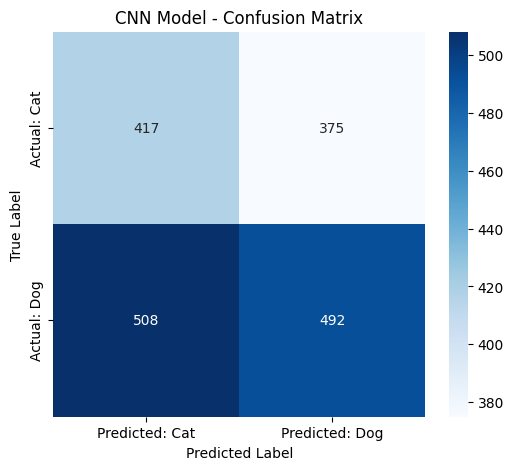

In [14]:
# Import required libraries for evaluation and visualization
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get the true class labels (0s and 1s) from the test data
# These are automatically assigned based on folder names in flow_from_directory
true_labels = test_set.classes

# Step 2: Predict probabilities for all test images
# We must reset the test generator so it starts from the beginning
test_set.reset()
y_pred_prob = cnn_model.predict(test_set, steps=len(test_set), verbose=1)  # Predict probabilities

# Step 3: Convert predicted probabilities into binary class predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype('int').ravel()

# Step 4: Generate the confusion matrix and accuracy score
cm = confusion_matrix(true_labels, y_pred)      # Rows: actual, Columns: predicted
acc = accuracy_score(true_labels, y_pred)       # Overall accuracy of the model

# Step 5: Print confusion matrix and accuracy
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", round(acc * 100, 2), "%")  # Show accuracy in %

# Step 6: Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))  # Set the plot size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Cat', 'Predicted: Dog'],
            yticklabels=['Actual: Cat', 'Actual: Dog'])

# Add plot labels and title
plt.title("CNN Model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()  # Display the plot


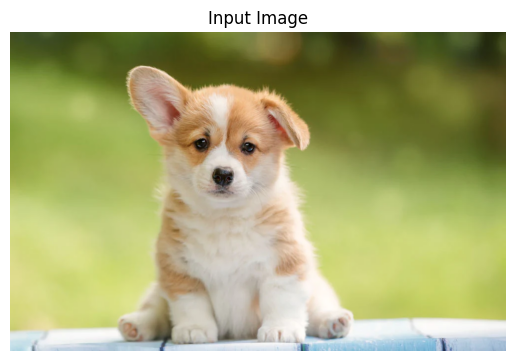

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: Dog


In [17]:
## Import the imread function from skimage.io to read image files
#from skimage.io import imread
# Import the resize function from skimage.transform to resize image dimensions
#from skimage.transform import resize
# Step 1: Read the image from the given file path (returns a NumPy array)
#img = imread('/content/drive/MyDrive/All_DataSets/dataset/dataset/pembroke-welsh-corgi-puppy_1000x.jpg')
# Step 2: Resize the image to match the input shape expected by the CNN model (64x64 pixels with 3 color channels)
#img = resize(img, (64, 64))
# Note: resize also normalizes pixel values from [0, 255] to [0.0, 1.0]
# Step 3: Reshape the image to a 4D array (1 image, 64 height, 64 width, 3 channels)
# CNN models expect a 4D input: (batch_size, height, width, channels)
#img = img.reshape(1, 64, 64, 3)
# Step 4: Use the trained CNN model to make a prediction and convert the output probability into binary class (0 or 1)
# If predicted probability > 0.5, classify as class 1, else class 0
#(cnn_model.predict(img) > 0.5).astype('int')




# Import required libraries
from skimage.io import imread                 # To read image files
from skimage.transform import resize          # To resize the image
import matplotlib.pyplot as plt               # To display the image
import numpy as np                            # For numerical operations

# Step 1: Load the image from disk
img_path = '/content/drive/MyDrive/All_DataSets/dataset/dataset/pembroke-welsh-corgi-puppy_1000x.jpg'
img = imread(img_path)                        # Read image as a NumPy array (H, W, 3)

# Step 2: Show original image for reference
plt.imshow(img)
plt.title("Input Image")
plt.axis('off')  # Hide axis
plt.show()

# Step 3: Resize the image to match model input (64x64)
img_resized = resize(img, (64, 64))           # Also scales pixel values to [0,1]

# Step 4: Reshape to a 4D batch (1, 64, 64, 3)
img_batch = img_resized.reshape(1, 64, 64, 3)  # Required shape for model.predict()

# Step 5: Predict using CNN model
prediction = cnn_model.predict(img_batch)     # Outputs probability (0.0 to 1.0)

# Step 6: Convert probability to binary class label
result = (prediction > 0.5).astype('int')     # 0 or 1 based on threshold

# Step 7: Print result
class_map = {0: "Cat", 1: "Dog"}  # You can modify this based on train_set.class_indices
predicted_class = class_map[result[0][0]]
print("Predicted Class:", predicted_class)


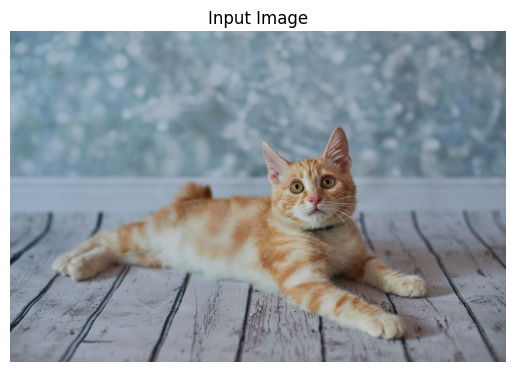

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: Cat


In [18]:
# Import required libraries
from skimage.io import imread                 # To read image files
from skimage.transform import resize          # To resize the image
import matplotlib.pyplot as plt               # To display the image
import numpy as np                            # For numerical operations

# Step 1: Load the image from disk
img_path = '/content/drive/MyDrive/All_DataSets/dataset/dataset/GettyImages-808977400-ccb5680303de47b3a083558f0d47da39.jpg'
img = imread(img_path)                        # Read image as a NumPy array (H, W, 3)

# Step 2: Show original image for reference
plt.imshow(img)
plt.title("Input Image")
plt.axis('off')  # Hide axis
plt.show()

# Step 3: Resize the image to match model input (64x64)
img_resized = resize(img, (64, 64))           # Also scales pixel values to [0,1]

# Step 4: Reshape to a 4D batch (1, 64, 64, 3)
img_batch = img_resized.reshape(1, 64, 64, 3)  # Required shape for model.predict()

# Step 5: Predict using CNN model
prediction = cnn_model.predict(img_batch)     # Outputs probability (0.0 to 1.0)

# Step 6: Convert probability to binary class label
result = (prediction > 0.5).astype('int')     # 0 or 1 based on threshold

# Step 7: Print result
class_map = {0: "Cat", 1: "Dog"}  # You can modify this based on train_set.class_indices
predicted_class = class_map[result[0][0]]
print("Predicted Class:", predicted_class)